# 1. 프로젝트 소개 (어떤 분석을 하였는가)
**남녀 소개팅 매칭 요소 분석 및 예측 프로그램 만들기**

남녀 집단 내에서 남녀가 소개팅한 후 설문에 응답한 결과 데이터를 바탕으로
어떤 남녀가 매칭될 확률이 높을지 예측하는 것을 목표로 함

# 2. 데이터 소개 및 시각화(출처, 형식, 분포 등)

In [142]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets, linear_model
from sklearn import decomposition
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn import cluster
from scipy import stats


# GradientBoosting용
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# svm용
from sklearn import datasets, model_selection, metrics, svm
from sklearn.externals import joblib
from sklearn.externals import joblib

#knn
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score


df_data = pd.read_csv('speeddating.csv', na_values = '?', encoding='utf-8') # 엑셀 파일 읽기
df_data.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,5.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,5.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,6.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2.0,4.0,[2-5],[2-5],Law,19.0,18.0,19.0,18.0,14.0,12.0,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10.0,10.0,10.0,10.0,10.0,10.0,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,8.0,9.0,8.0,5.0,7.0,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100

## Data info

- **gender** : Gender of self     
- **age** : Age of self  
- **age_o** : Age of partner  
- **d_age** : Difference in age  
- **race** : Race of self  
- **race_o** : Race of partner  
- **samerace** : Whether the two persons have the same race or not.  
- **importance_same_race** : How important is it that partner is of same race?  
- **importance_same_religion** : How important is it that partner has same religion?  
- **field** : Field of study  
- **pref_o_attractive** : How important does partner rate attractiveness  
- **pref_o_sinsere** : How important does partner rate sincerity  
- **pref_o_intelligence** : How important does partner rate intelligence  
- **pref_o_funny** : How important does partner rate being funny  
- **pref_o_ambitious** : How important does partner rate ambition  
- **pref_o_shared_interests** : How important does partner rate having shared interests  
- **attractive_o** : Rating by partner (about me) at night of event on attractiveness  
- **sincere_o** : Rating by partner (about me) at night of event on sincerity  
- **intelligence_o** : Rating by partner (about me) at night of event on intelligence  
- **funny_o** : Rating by partner (about me) at night of event on being funny  
- **ambitous_o** : Rating by partner (about me) at night of event on being ambitious  
- **shared_interests_o** : Rating by partner (about me) at night of event on shared interest  
- **attractive_important** : What do you look for in a partner - attractiveness  
- **sincere_important** : What do you look for in a partner - sincerity  
- **intellicence_important** : What do you look for in a partner - intelligence  
- **funny_important** : What do you look for in a partner - being funny  
- **ambtition_important** : What do you look for in a partner - ambition  
- **shared_interests_important** : What do you look for in a partner - shared interests  
- **attractive** : Rate yourself - attractiveness  
- **sincere** : Rate yourself - sincerity   
- **intelligence** : Rate yourself - intelligence   
- **funny** : Rate yourself - being funny   
- **ambition** : Rate yourself - ambition  
- **attractive_partner** : Rate your partner - attractiveness  
- **sincere_partner** : Rate your partner - sincerity   
- **intelligence_partner** : Rate your partner - intelligence   
- **funny_partner** : Rate your partner - being funny   
- **ambition_partner** : Rate your partner - ambition   
- **shared_interests_partner** : Rate your partner - shared interests  
- **sports** : Your own interests [1-10]  
- **tvsports** 
- **exercise**
- **dining**
- **museums** 
- **art**  
- **hiking**  
- **gaming**  
- **clubbing**  
- **reading**  
- **tv**  
- **theater**  
- **movies**  
- **concerts**  
- **music**  
- **shopping**  
- **yoga**  
- **interests_correlate** : Correlation between participant’s and partner’s ratings of interests.  
- **expected_happy_with_sd_people** : How happy do you expect to be with the people you meet during the speed-dating event?  
- **expected_num_interested_in_me** : Out of the 20 people you will meet, how many do you expect will be interested in dating you?  
- **expected_num_matches** : How many matches do you expect to get?  
- **like** : Did you like your partner?  
- **guess_prob_liked** : How likely do you think it is that your partner likes you?   
- **met** : Have you met your partner before?  
- **decision** : Decision at night of event.
- **decision_o** : Decision of partner at night of event.  
- **match** : Match (yes/no)

**참고) 나이대별 선호 요소 비교**

1. importance_same_race
2. importance_same_religion
3. attractive_important
4. sincere_important 
5. intellicence_important
6. funny_important
7. ambtition_important
8. shared_interests_important

**같은 인종에 대한 중요도**

In [95]:
# 실수로 표현된 나이를 구간 척도로 변환. 20대: 20~29세, 30대: 30~39세, 40대: 40~49세, 50대: 51~59세

age_data= df_data.copy()
age_data['age'].isna().sum()

95

In [100]:
age_data_dropped = age_data['age'].dropna()

In [102]:
age_data_dropped.isna().sum()

0

In [105]:
age_data_dropped

0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
5       21.0
6       21.0
7       21.0
8       21.0
9       21.0
10      24.0
11      24.0
12      24.0
13      24.0
14      24.0
15      24.0
16      24.0
17      24.0
18      24.0
19      24.0
20      25.0
21      25.0
22      25.0
23      25.0
24      25.0
25      25.0
26      25.0
27      25.0
28      25.0
29      25.0
        ... 
8348    27.0
8349    27.0
8350    27.0
8351    27.0
8352    27.0
8353    27.0
8354    27.0
8355    27.0
8356    25.0
8357    25.0
8358    25.0
8359    25.0
8360    25.0
8361    25.0
8362    25.0
8363    25.0
8364    25.0
8365    25.0
8366    25.0
8367    25.0
8368    25.0
8369    25.0
8370    25.0
8371    25.0
8372    25.0
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8283, dtype: float64

In [111]:
test_df = pd.DataFrame({'age':list(age_data_dropped)})

In [112]:
test_df.head()

,age
0,21.0
1,21.0
2,21.0
3,21.0
4,21.0


In [113]:
def age_classify(x):
    if x<= 29.0:
        return('20')
    elif x<= 39.0:
        return('30')
    elif x<= 49.0:
        return('40')
    else:
        return('50')
test_df['age_section'] = test_df['age'].apply(age_classify)
test_df.head(3)

,age,age_section
0,21.0,20
1,21.0,20
2,21.0,20


In [125]:
importance_same_race_data= df_data.copy()

In [126]:
importance_same_race_data_dropped = importance_same_race_data['importance_same_race'].dropna()

In [127]:
importance_same_race_data_dropped.isna().sum()

0

In [129]:
test_df2 = pd.DataFrame({'importance_same_race':list(importance_same_race_data_dropped)})
test_df2.head()

,importance_same_race
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [131]:
pd.crosstab(test_df.age_section, test_df2.importance_same_race, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# importance_same_race : 같은 인종 여부에 대한 중요도 (1~10)

importance_same_race,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
age_section,,,,,,,,,,,,
20,8,2209,766,814,423,514,473,487,606,347,241,6888
30,0,567,188,169,87,129,51,56,57,56,9,1369
40,0,6,0,0,0,14,0,0,0,0,0,20
50,0,0,0,0,0,0,0,0,0,6,0,6
All,8,2782,954,983,510,657,524,543,663,409,250,8283


In [137]:
crosstab = pd.crosstab(test_df.age_section, test_df2.importance_same_race, margins=True)

crosstab.columns=["0","1","2","3","4","5","6","7","8","9","10","합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,0,1,2,3,4,5,6,7,8,9,10,합계
20대,8,2209,766,814,423,514,473,487,606,347,241,6888
30대,0,567,188,169,87,129,51,56,57,56,9,1369
40대,0,6,0,0,0,14,0,0,0,0,0,20
50대,0,0,0,0,0,0,0,0,0,6,0,6
합계,8,2782,954,983,510,657,524,543,663,409,250,8283


In [144]:
# pd.crosstab(test_df.age_section, test_df2.importance_same_race, margins=True, normalize=True)

**같은 지역에 대한 중요도**

In [162]:
importance_same_religion = df_data.copy()

In [163]:
importance_same_religion_dropped = importance_same_religion['importance_same_religion'].dropna()
importance_same_religion_dropped.isna().sum()

0

In [164]:
test_df3 = pd.DataFrame({'importance_same_religion':list(importance_same_religion_dropped)})
test_df3.head()

,importance_same_religion
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [167]:
importance_same_religion_dropped.isna().sum()

0

In [168]:
pd.crosstab(test_df.age_section, test_df3.importance_same_religion, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# importance_same_religion : 같은 지역 여부에 대한 중요도 (1~10)

importance_same_religion,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
age_section,,,,,,,,,,,
20,2462,678,766,480,597,535,384,440,244,302,6888
30,534,185,163,44,100,126,83,71,38,25,1369
40,20,0,0,0,0,0,0,0,0,0,20
50,0,0,0,0,0,0,0,6,0,0,6
All,3016,863,929,524,697,661,467,517,282,327,8283


In [169]:
crosstab = pd.crosstab(test_df.age_section, test_df3.importance_same_religion, margins=True)

crosstab.columns=["1","2","3","4","5","6","7","8","9","10","합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,1,2,3,4,5,6,7,8,9,10,합계
20대,2462,678,766,480,597,535,384,440,244,302,6888
30대,534,185,163,44,100,126,83,71,38,25,1369
40대,20,0,0,0,0,0,0,0,0,0,20
50대,0,0,0,0,0,0,0,6,0,0,6
합계,3016,863,929,524,697,661,467,517,282,327,8283


**매력에 대한 중요도**

In [170]:
attractive_important = df_data.copy()

In [171]:
attractive_important_dropped = attractive_important['attractive_important'].dropna()
attractive_important_dropped.isna().sum()

0

In [172]:
test_df4 = pd.DataFrame({'attractive_important':list(attractive_important_dropped)})
test_df4.head()

,attractive_important
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0


In [173]:
attractive_important_dropped.isna().sum()

0

In [174]:
def attractive_classify(x):
    if x<= 20.0:
        return('1')
    elif x<= 40.0:
        return('2')
    elif x<= 60.0:
        return('3')
    elif x<= 80.0:
        return('4')
    else:
        return('5')
test_df4['attractive_section'] = test_df4['attractive_important'].apply(attractive_classify)
test_df4.head()

,attractive_important,attractive_section
0,15.0,1
1,15.0,1
2,15.0,1
3,15.0,1
4,15.0,1


In [175]:
pd.crosstab(test_df.age_section, test_df4.attractive_section, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# attractive_section : 매력에 대한 중요도 (0~100까지의 중요도를 1~5까지의 구간으로 나눔)

attractive_section,1,2,3,4,5,All
age_section,,,,,,
20,4444,1989,352,66,37,6888
30,830,467,66,6,0,1369
40,6,14,0,0,0,20
50,0,0,6,0,0,6
All,5280,2470,424,72,37,8283


In [176]:
crosstab = pd.crosstab(test_df.age_section, test_df4.attractive_section, margins=True)

crosstab.columns=["거의 중요하지 않음", "조금 중요함","보통", "많이 중요함", "매우 중요함", "합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,거의 중요하지 않음,조금 중요함,보통,많이 중요함,매우 중요함,합계
20대,4444,1989,352,66,37,6888
30대,830,467,66,6,0,1369
40대,6,14,0,0,0,20
50대,0,0,6,0,0,6
합계,5280,2470,424,72,37,8283


**사려깊음에 대한 중요도**

In [178]:
sincere_important = df_data.copy()

In [179]:
sincere_important_dropped = sincere_important['sincere_important'].dropna()
sincere_important_dropped.isna().sum()

0

In [180]:
test_df5 = pd.DataFrame({'sincere_important':list(sincere_important_dropped)})
test_df5.head()

,sincere_important
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0


In [181]:
sincere_important_dropped.isna().sum()

0

In [182]:
def sincere_classify(x):
    if x<= 15.0:
        return('1')
    elif x<= 30.0:
        return('2')
    elif x<= 45.0:
        return('3')
    else:
        return('4')
test_df5['sincere_section'] = test_df5['sincere_important'].apply(sincere_classify)
test_df5.head()

,sincere_important,sincere_section
0,20.0,2
1,20.0,2
2,20.0,2
3,20.0,2
4,20.0,2


In [183]:
pd.crosstab(test_df.age_section, test_df5.sincere_section, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# sincere_section : 사려깊음에 대한 중요도를 (0~60까지의 중요도를 1~4까지의 구간으로 나눔)

sincere_section,1,2,3,4,All
age_section,,,,,
20,2458,4263,147,20,6888
30,503,857,6,3,1369
40,0,20,0,0,20
50,6,0,0,0,6
All,2967,5140,153,23,8283


In [184]:
crosstab = pd.crosstab(test_df.age_section, test_df5.sincere_section, margins=True)

crosstab.columns=["조금 중요함","보통", "많이 중요함", "매우 중요함", "합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,조금 중요함,보통,많이 중요함,매우 중요함,합계
20대,2458,4263,147,20,6888
30대,503,857,6,3,1369
40대,0,20,0,0,20
50대,6,0,0,0,6
합계,2967,5140,153,23,8283


**지능에 대한 중요도**

In [185]:
intellicence_important = df_data.copy()

In [186]:
intellicence_important_dropped = intellicence_important['intellicence_important'].dropna()
intellicence_important_dropped.isna().sum()

0

In [187]:
test_df6 = pd.DataFrame({'intellicence_important':list(intellicence_important_dropped)})
test_df6.head()

,intellicence_important
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0


In [188]:
intellicence_important_dropped.isna().sum()

0

In [189]:
def intellicence_classify(x):
    if x<= 10.0:
        return('1')
    elif x<= 20.0:
        return('2')
    elif x<= 30.0:
        return('3')
    elif x<= 40.0:
        return('4')
    else:
        return('5')
test_df6['intellicence_section'] = test_df6['intellicence_important'].apply(intellicence_classify)
test_df6.head()

,intellicence_important,intellicence_section
0,20.0,2
1,20.0,2
2,20.0,2
3,20.0,2
4,20.0,2


In [190]:
pd.crosstab(test_df.age_section, test_df6.intellicence_section, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# intellicence_section : 지능에 대한 중요도를 (0~50까지의 중요도를 1~5까지의 구간으로 나눔)

intellicence_section,1,2,3,4,5,All
age_section,,,,,,
20,703,4132,1809,172,72,6888
30,138,792,386,32,21,1369
40,0,0,20,0,0,20
50,0,0,6,0,0,6
All,841,4924,2221,204,93,8283


In [191]:
crosstab = pd.crosstab(test_df.age_section, test_df6.intellicence_section, margins=True)

crosstab.columns=["거의 중요하지 않음", "조금 중요함", "보통", "많이 중요함", "매우 중요함", "합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,거의 중요하지 않음,조금 중요함,보통,많이 중요함,매우 중요함,합계
20대,703,4132,1809,172,72,6888
30대,138,792,386,32,21,1369
40대,0,0,20,0,0,20
50대,0,0,6,0,0,6
합계,841,4924,2221,204,93,8283


**유머에 대한 중요도**

In [192]:
funny_important = df_data.copy()

In [195]:
funny_important_dropped = funny_important['funny_important'].dropna()
funny_important_dropped.isna().sum()

0

In [196]:
test_df7 = pd.DataFrame({'funny_important':list(funny_important_dropped)})
test_df7.head()

,funny_important
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0


In [203]:
funny_important_dropped.isna().sum()

0

In [199]:
def funny_classify(x):
    if x<= 10.0:
        return('1')
    elif x<= 20.0:
        return('2')
    elif x<= 30.0:
        return('3')
    elif x<= 40.0:
        return('4')
    else:
        return('5')
test_df7['funny_section'] = test_df7['funny_important'].apply(funny_classify)
test_df7.head()

,funny_important,funny_section
0,15.0,2
1,15.0,2
2,15.0,2
3,15.0,2
4,15.0,2


In [200]:
pd.crosstab(test_df.age_section, test_df7.funny_section, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# funny_section : 유머에 대한 중요도를 (0~50까지의 중요도를 1~5까지의 구간으로 나눔)

funny_section,1,2,3,4,5,All
age_section,,,,,,
20,1223,4623,959,53,30,6888
30,334,779,240,16,0,1369
40,0,0,20,0,0,20
50,0,4,2,0,0,6
All,1557,5406,1221,69,30,8283


In [202]:
crosstab = pd.crosstab(test_df.age_section, test_df7.funny_section, margins=True)

crosstab.columns=["거의 중요하지 않음", "조금 중요함", "보통", "많이 중요함", "매우 중요함", "합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,거의 중요하지 않음,조금 중요함,보통,많이 중요함,매우 중요함,합계
20대,1223,4623,959,53,30,6888
30대,334,779,240,16,0,1369
40대,0,0,20,0,0,20
50대,0,4,2,0,0,6
합계,1557,5406,1221,69,30,8283


**야망에 대한 중요도**

In [204]:
ambtition_important = df_data.copy()

In [205]:
ambtition_important_dropped = ambtition_important['ambtition_important'].dropna()
ambtition_important_dropped.isna().sum()

0

In [206]:
test_df8 = pd.DataFrame({'ambtition_important':list(ambtition_important_dropped)})
test_df8.head()

,ambtition_important
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0


In [207]:
ambtition_important_dropped.isna().sum()

0

In [213]:
def ambtition_classify(x):
    if x<= 10.0:
        return('1')
    elif x<= 20.0:
        return('2')
    elif x<= 30.0:
        return('3')
    else:
        return('4')
test_df8['ambtition_section'] = test_df8['ambtition_important'].apply(ambtition_classify)
test_df8.head()

,ambtition_important,ambtition_section
0,15.0,2
1,15.0,2
2,15.0,2
3,15.0,2
4,15.0,2


In [214]:
pd.crosstab(test_df.age_section, test_df8.ambtition_section, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# ambtition_section : 야망에 대한 중요도를 (0~53까지의 중요도를 1~5까지의 구간으로 나눔)

ambtition_section,1,2,3,4,All
age_section,,,,,
20,3784,3031,59,10,6884
30,810,533,26,0,1369
40,14,6,0,0,20
50,6,0,0,0,6
All,4614,3570,85,10,8279


In [215]:
crosstab = pd.crosstab(test_df.age_section, test_df8.ambtition_section, margins=True)

crosstab.columns=["거의 중요하지 않음", "조금 중요함", "많이 중요함", "매우 중요함", "합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,거의 중요하지 않음,조금 중요함,많이 중요함,매우 중요함,합계
20대,3784,3031,59,10,6884
30대,810,533,26,0,1369
40대,14,6,0,0,20
50대,6,0,0,0,6
합계,4614,3570,85,10,8279


**취미/흥미 공유에 대한 중요도**

In [216]:
shared_interests_important = df_data.copy()

In [217]:
shared_interests_important_dropped = shared_interests_important['shared_interests_important'].dropna()
shared_interests_important_dropped.isna().sum()

0

In [218]:
test_df9 = pd.DataFrame({'shared_interests_important':list(shared_interests_important_dropped)})
test_df9.head()

,shared_interests_important
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0


In [219]:
shared_interests_important_dropped.isna().sum()

0

In [220]:
def shared_interests_classify(x):
    if x<= 10.0:
        return('1')
    elif x<= 20.0:
        return('2')
    else:
        return('3')
test_df9['shared_interests_section'] = test_df9['shared_interests_important'].apply(shared_interests_classify)
test_df9.head()

,shared_interests_important,shared_interests_section
0,15.0,2
1,15.0,2
2,15.0,2
3,15.0,2
4,15.0,2


In [221]:
pd.crosstab(test_df.age_section, test_df7.funny_section, margins=True) # margin : 합계에 해당하는 "All" 추가 여부

# age : 나이대 (20 ~ 50대)
# shared_interests_section : 취미/흥미 공유에 대한 중요도를 (0~30까지의 중요도를 1~3까지의 구간으로 나눔)

funny_section,1,2,3,4,5,All
age_section,,,,,,
20,1223,4623,959,53,30,6888
30,334,779,240,16,0,1369
40,0,0,20,0,0,20
50,0,4,2,0,0,6
All,1557,5406,1221,69,30,8283


In [222]:
crosstab = pd.crosstab(test_df.age_section, test_df9.shared_interests_section, margins=True)

crosstab.columns=["조금 중요함", "보통", "많이 중요함", "합계"]
crosstab.index=["20대", "30대", "40대", "50대", "합계"]
crosstab

,조금 중요함,보통,많이 중요함,합계
20대,3374,3200,288,6862
30대,703,623,43,1369
40대,0,20,0,20
50대,4,2,0,6
합계,4081,3845,331,8257


# 3. 데이터 전처리 과정(적용한 전처리 방법)

- **불필요한 열이나 예측에 방해가 되는 열 제거**
- **결측치 확인 및 제거**
- **텍스트 숫자로 교체**

In [2]:
y_data = df_data[['match']]
y_data.head()

,match
0,0
1,0
2,1
3,1
4,1


In [3]:
x_data = df_data.copy()
del x_data['match']

x_data.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o
0,0,1,female,21.0,27.0,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0
1,0,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0
2,1,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1
3,0,1,female,21.0,23.0,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1
4,0,1,female,21.0,24.0,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-4],[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1


In [4]:
# 결측치 확인 
x_data.isna().sum() # x_data.isnull().sum()이랑 같은 방식

has_null                              0
wave                                  0
gender                                0
age                                  95
age_o                               104
d_age                                 0
d_d_age                               0
race                                 63
race_o                               73
samerace                              0
importance_same_race                 79
importance_same_religion             79
d_importance_same_race                0
d_importance_same_religion            0
field                                63
pref_o_attractive                    89
pref_o_sincere                       89
pref_o_intelligence                  89
pref_o_funny                         98
pref_o_ambitious                    107
pref_o_shared_interests             129
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0


In [5]:
# 결측치 상위 두 항목 열 지우기
del x_data['expected_num_interested_in_me']
del x_data['expected_num_matches']

# 매칭 예측 시 필요없다고 생각되는 열 제거
del x_data['d_expected_num_interested_in_me']
del x_data['d_expected_num_matches']

x_data.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o
0,0,1,female,21.0,27.0,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-0.33],3.0,[0-4],7.0,6.0,[6-8],[5-6],0.0,1,0
1,0,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0.33-1],3.0,[0-4],7.0,5.0,[6-8],[5-6],1.0,1,0
2,1,1,female,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-0.33],3.0,[0-4],7.0,NaN,[6-8],[0-4],1.0,1,1
3,0,1,female,21.0,23.0,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0.33-1],3.0,[0-4],7.0,6.0,[6-8],[5-6],0.0,1,1
4,0,1,female,21.0,24.0,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-0.33],3.0,[0-4],6.0,6.0,[6-8],[5-6],0.0,1,1


In [6]:
x_data['gender'] = x_data['gender'].replace(['male', 'female'], [0,1]) # 텍스트 숫자로 교체
x_data.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o
0,0,1,1,21.0,27.0,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-0.33],3.0,[0-4],7.0,6.0,[6-8],[5-6],0.0,1,0
1,0,1,1,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0.33-1],3.0,[0-4],7.0,5.0,[6-8],[5-6],1.0,1,0
2,1,1,1,21.0,22.0,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-0.33],3.0,[0-4],7.0,NaN,[6-8],[0-4],1.0,1,1
3,0,1,1,21.0,23.0,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0.33-1],3.0,[0-4],7.0,6.0,[6-8],[5-6],0.0,1,1
4,0,1,1,21.0,24.0,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-0.33],3.0,[0-4],6.0,6.0,[6-8],[5-6],0.0,1,1


In [7]:
x_data.describe()

,has_null,wave,gender,age,age_o,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o
count,8378.00000,8378.000000,8378.000000,8283.000000,8274.000000,8378.000000,8378.000000,8299.000000,8299.000000,8289.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,8138.000000,8069.000000,8003.000000,8378.000000,8378.000000
mean,0.87491,11.350919,0.499403,26.358928,26.364999,4.185605,0.395799,3.784793,3.651645,22.495347,...,7.851066,5.631281,4.339197,0.196010,5.534131,6.134087,5.207523,0.049856,0.419909,0.419551
std,0.33084,5.995903,0.500029,3.566763,3.563648,4.596171,0.489051,2.845708,2.805237,12.569802,...,1.791827,2.608913,2.717612,0.303539,1.734059,1.841285,2.129565,0.282168,0.493573,0.493515
min,0.00000,1.000000,0.000000,18.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,0.000000,24.000000,24.000000,1.000000,0.000000,1.000000,1.000000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,5.000000,4.000000,0.000000,0.000000,0.000000
50%,1.00000,11.000000,0.000000,26.000000,26.000000,3.000000,0.000000,3.000000,3.000000,20.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,6.000000,5.000000,0.000000,0.000000,0.000000
75%,1.00000,15.000000,1.000000,28.000000,28.000000,5.000000,1.000000,6.000000,6.000000,25.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,7.000000,7.000000,0.000000,1.000000,1.000000
max,1.00000,21.000000,1.000000,55.000000,55.000000,37.000000,1.000000,10.000000,10.000000,100.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,10.000000,10.000000,8.000000,1.000000,1.000000


In [8]:
nnew_df = x_data.copy()

범주를 숫자로 변환

In [9]:
nnew_df['d_d_age']=nnew_df['d_d_age'].replace(['[0-1]', '[2-3]', '[4-6]', '[7-37]'], [0,1,2,3])  
nnew_df['d_importance_same_race']=nnew_df['d_importance_same_race'].replace(['[0-1]', '[2-5]', '[6-10]'], [0,1,2])  
nnew_df['d_importance_same_religion']=nnew_df['d_importance_same_religion'].replace(['[0-1]', '[2-5]', '[6-10]'], [0,1,2])
nnew_df['d_pref_o_attractive']=nnew_df['d_pref_o_attractive'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_pref_o_sincere']=nnew_df['d_pref_o_sincere'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_pref_o_intelligence']=nnew_df['d_pref_o_intelligence'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_pref_o_funny']=nnew_df['d_pref_o_funny'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_pref_o_ambitious']=nnew_df['d_pref_o_ambitious'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_pref_o_shared_interests']=nnew_df['d_pref_o_shared_interests'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_attractive_o']=nnew_df['d_attractive_o'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_sinsere_o']=nnew_df['d_sinsere_o'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_intelligence_o']=nnew_df['d_intelligence_o'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_funny_o']=nnew_df['d_funny_o'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_ambitous_o']=nnew_df['d_ambitous_o'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_shared_interests_o']=nnew_df['d_shared_interests_o'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_attractive_important']=nnew_df['d_attractive_important'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_sincere_important']=nnew_df['d_sincere_important'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_intellicence_important']=nnew_df['d_intellicence_important'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_funny_important']=nnew_df['d_funny_important'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_ambtition_important']=nnew_df['d_ambtition_important'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_shared_interests_important']=nnew_df['d_shared_interests_important'].replace(['[0-15]', '[16-20]', '[21-100]'], [0,1,2])
nnew_df['d_attractive']=nnew_df['d_attractive'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_sincere']=nnew_df['d_sincere'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_intelligence']=nnew_df['d_intelligence'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_funny']=nnew_df['d_funny'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_ambition']=nnew_df['d_ambition'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_attractive_partner']=nnew_df['d_attractive_partner'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_sincere_partner']=nnew_df['d_sincere_partner'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_intelligence_partner']=nnew_df['d_intelligence_partner'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_funny_partner']=nnew_df['d_funny_partner'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_ambition_partner']=nnew_df['d_ambition_partner'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_shared_interests_partner']=nnew_df['d_shared_interests_partner'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_expected_happy_with_sd_people']=nnew_df['d_expected_happy_with_sd_people'].replace(['[0-4]', '[5-6]', '[7-10]'], [0,1,2])
nnew_df['d_like']=nnew_df['d_like'].replace(['[0-5]', '[6-8]', '[9-10]'], [0,1,2])
nnew_df['d_guess_prob_liked']=nnew_df['d_guess_prob_liked'].replace(['[0-4]', '[5-6]', '[7-10]'], [0,1,2])


# 실수 범위의 열들을 구간 범위로 전환

In [10]:
nnnew_df = nnew_df.copy()

필요없는 feature 지우기

In [11]:
del nnnew_df ['wave']
del nnnew_df ['d_interests_correlate']
del nnnew_df ['importance_same_race']
del nnnew_df ['importance_same_religion']
del nnnew_df ['decision']
del nnnew_df ['decision_o']
del nnnew_df ['expected_happy_with_sd_people']
del nnnew_df ['has_null']

for d in nnnew_df.loc[:,'age':'d_age']:
    del nnnew_df [d]
    
for d in nnnew_df.loc[:,'race':'race_o']:
    del nnnew_df [d]

for d in nnnew_df.loc[:,'pref_o_attractive':'pref_o_shared_interests']:
    del nnnew_df [d]
    
for d in nnnew_df.loc[:,'attractive_o':'shared_interests_o']:
    del nnnew_df [d]
    
for d in nnnew_df.loc[:,'attractive_important':'shared_interests_important']:
    del nnnew_df [d]

for d in nnnew_df.loc[:,'attractive':'d_ambition']:
    del nnnew_df [d]
    
for d in nnnew_df.loc[:,'attractive_partner':'shared_interests_partner']:
    del nnnew_df [d]
    
for d in nnnew_df.loc[:,'sports':'d_yoga']:
    del nnnew_df [d]
    
for d in nnnew_df.loc[:,'like':'guess_prob_liked']:
    del nnnew_df [d]
    
# 범주형 feature 형식 제외하고 삭제

In [12]:
nnnew_df.head() # 범주형으로 변환한 전처리 데이터

,gender,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,field,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,...,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,interests_correlate,d_expected_happy_with_sd_people,d_like,d_guess_prob_liked,met
0,1,2,0,1,1,Law,2,1,1,1,...,2,1,1,1,0,0.14,0,1,1,0.0
1,1,0,0,1,1,Law,2,0,0,2,...,1,1,1,0,1,0.54,0,1,1,1.0
2,1,0,1,1,1,Law,1,1,1,1,...,1,2,1,0,1,0.16,0,1,0,1.0
3,1,1,0,1,1,Law,2,0,0,2,...,1,1,1,1,1,0.61,0,1,1,0.0
4,1,1,0,1,1,Law,2,0,1,0,...,1,1,1,1,1,0.21,0,1,1,0.0


In [13]:
nnnnew_df=nnew_df.copy()

In [14]:
del nnnnew_df ['wave']
del nnnnew_df ['has_null']
del nnnnew_df ['age']
del nnnnew_df ['age_o']
del nnnnew_df ['d_importance_same_race']
del nnnnew_df ['d_importance_same_religion']
del nnnnew_df ['d_interests_correlate']
del nnnnew_df ['d_expected_happy_with_sd_people']
del nnnnew_df ['d_like']
del nnnnew_df ['d_guess_prob_liked']
del nnnnew_df ['decision']
del nnnnew_df ['decision_o']

    
for d in nnnnew_df.loc[:,'d_d_age':'race_o']:
    del nnnnew_df [d]

for d in nnnnew_df.loc[:,'d_pref_o_attractive':'d_pref_o_shared_interests']:
    del nnnnew_df [d]
    
for d in nnnnew_df.loc[:,'d_attractive_o':'d_shared_interests_o']:
    del nnnnew_df [d]
    
for d in nnnnew_df.loc[:,'d_attractive_important':'d_shared_interests_important']:
    del nnnnew_df [d]

for d in nnnnew_df.loc[:,'attractive':'d_ambition']:
    del nnnnew_df [d]

for d in nnnnew_df.loc[:,'d_attractive_partner':'d_shared_interests_partner']:
    del nnnnew_df [d]

for d in nnnnew_df.loc[:,'sports':'d_yoga']:
    del nnnnew_df [d]

# 수치형 feature 형식 제외하고 삭제

In [15]:
nnnnew_df.head() # 수치형을 유지한 전처리 데이터

,gender,d_age,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met
0,1,6,0,2.0,4.0,Law,35.0,20.0,20.0,20.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0.0
1,1,1,0,2.0,4.0,Law,60.0,0.0,0.0,40.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,1.0
2,1,1,1,2.0,4.0,Law,19.0,18.0,19.0,18.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,NaN,1.0
3,1,2,0,2.0,4.0,Law,30.0,5.0,15.0,40.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,0.0
4,1,3,0,2.0,4.0,Law,30.0,10.0,20.0,10.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,0.0


In [16]:
# met 열 결측치 최빈값으로 대체               

# 최빈값 확인 및 대체
# most_freq = x_data['met'].value_counts(dropna = True).idxmax()
# print(most_freq)
# x_data['met'].fillna(most_freq, inplace = True)
# x_data

nnnnew_df['met'] = nnnnew_df['met'].fillna(0)
nnnnew_df

,gender,d_age,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met
0,1,6,0,2.0,4.0,Law,35.00,20.00,20.00,20.00,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0.0
1,1,1,0,2.0,4.0,Law,60.00,0.00,0.00,40.00,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,1.0
2,1,1,1,2.0,4.0,Law,19.00,18.00,19.00,18.00,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,NaN,1.0
3,1,2,0,2.0,4.0,Law,30.00,5.00,15.00,40.00,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,0.0
4,1,3,0,2.0,4.0,Law,30.00,10.00,20.00,10.00,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,0.0
5,1,4,0,2.0,4.0,Law,50.00,0.00,30.00,10.00,...,9.0,7.0,4.0,6.0,4.0,0.25,3.0,6.0,5.0,0.0
6,1,9,0,2.0,4.0,Law,35.00,15.00,25.00,10.00,...,6.0,7.0,4.0,6.0,7.0,0.34,3.0,6.0,5.0,0.0
7,1,6,0,2.0,4.0,Law,33.33,11.11,11.11,11.11,...,9.0,7.0,6.0,5.0,6.0,0.50,3.0,6.0,7.0,0.0
8,1,7,0,2.0,4.0,Law,50.00,0.00,25.00,10.00,...,6.0,8.0,9.0,8.0,8.0,0.28,3.0,7.0,7.0,0.0
9,1,3,0,2.0,4.0,Law,100.00,0.00,0.00,0.00,...,6.0,6.0,8.0,10.0,8.0,-0.36,3.0,6.0,6.0,0.0


In [17]:
nnnew_df.isna().sum() # 결측치 확인

gender                               0
d_d_age                              0
samerace                             0
d_importance_same_race               0
d_importance_same_religion           0
field                               63
d_pref_o_attractive                  0
d_pref_o_sincere                     0
d_pref_o_intelligence                0
d_pref_o_funny                       0
d_pref_o_ambitious                   0
d_pref_o_shared_interests            0
d_attractive_o                       0
d_sinsere_o                          0
d_intelligence_o                     0
d_funny_o                            0
d_ambitous_o                         0
d_shared_interests_o                 0
d_attractive_important               0
d_sincere_important                  0
d_intellicence_important             0
d_funny_important                    0
d_ambtition_important                0
d_shared_interests_important         0
d_attractive_partner                 0
d_sincere_partner        

In [18]:
nnnew_df.groupby('d_shared_interests_partner').mean() # d_shared_interests_partner를 기준으로 평균을 찾기

,gender,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,...,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,interests_correlate,d_expected_happy_with_sd_people,d_like,d_guess_prob_liked,met
d_shared_interests_partner,,,,,,,,,,,,,,,,,,,,,
0,0.502134,1.373880,0.376867,0.951985,0.922108,1.063594,0.833974,1.107768,0.753948,0.207426,...,0.564661,0.870679,0.922322,0.549509,0.663252,0.186580,0.975672,0.483995,0.649595,0.025723
1,0.498741,1.324307,0.413098,0.945214,0.892632,1.060768,0.792191,1.119018,0.797859,0.219773,...,0.927897,1.146411,1.193955,1.020781,1.023929,0.205301,1.100126,0.949307,1.191436,0.063850
2,0.478682,1.319767,0.461240,0.812016,0.707364,1.048450,0.740310,1.087209,0.858527,0.238372,...,1.341085,1.571705,1.625969,1.577519,1.507752,0.224940,1.217054,1.468992,1.591085,0.172888


In [19]:
nnnew_df.loc[(nnnew_df.d_shared_interests_partner==0)&(nnnew_df.interests_correlate.isnull()), 'interests_correlate'] =0.19
nnnew_df.loc[(nnnew_df.d_shared_interests_partner==1)&(nnnew_df.interests_correlate.isnull()), 'interests_correlate'] =0.21
nnnew_df.loc[(nnnew_df.d_shared_interests_partner==2)&(nnnew_df.interests_correlate.isnull()), 'interests_correlate'] =0.23
nnnew_df['met'] = nnnew_df['met'].fillna(0)

#d_shared_interests_partner의 값이 같은 행의 평균을 구해 interests_correlate에 결측치를 보충 (소수점 셋째자리에서 반올림)

- **전공분야를 5개 범주로 나누기** : 인문-0 상경-1 공학-2 자연과학-3 예체능-4 기타-5

In [20]:
nnnew_df['field_new']= nnnew_df['field'].str.lower()
nnnew_df['field_new'] = nnnew_df['field_new'].str.replace("\'", "")


field_to_5fields = {'nutritiron': 3, 'gs postbacc premed':3, 'art history':0, 'molecular biology':3, 'genetics & development':3, 
                    'electrical engg.':2, 'international politics':0, 'mba / master of international affairs [sipa]':0, 
                    'medicine and biochemistry':3, 'social studies education':0, 'ma teaching social studies':0, 'education policy':0,
                    'education- literacy specialist':0, 'anthropology/education':0, 'bilingual education':0, 'speech pathology':3, 
                    'education':0, 'math education':0, 'tesol':0, 'cognitive studies in education':0, 'finance/economics':1, 
                    'museum anthropology':0, 'environmental engineering':2, 'business administration':1, 
                    'curriculum and teaching/giftedness':0, 'instructional tech & media':0, 'school psychology':0, 
                    'instructional media and technology':0, 'sipa / mia':0, 'english education':0, 'ma in quantitative methods':0, 
                    'early childhood education':0, 'anthropology':0, 'architecture':2, 'urban planning':0, 
                    'ed.d. in higher education policy at tc':0,'human rights: middle east':0, 
                    'human rights':0, 'sipa-international affairs':0, 'teaching of english':0, 'african-american studies/history':0, 
                    'stats':0, 'social work/sipa':0, 'consulting':1, 'math of finance':1, 'mba - private equity / real estate':1, 
                    'general management/finance':1, 'biotechnology':2, 'gsas':2, 'industrial engineering':2, 
                    'industrial engineering/operations research':2, 'masters of industrial engineering':2,
                    'neurosciences/stem cells':3, 'biology phd':3, 'biochemistry/genetics':3, 'biochemistry & molecular biophysics':3, 
                    'public health':3, 'climate dynamics':3, 'theater':4, 'mfa acting program':4, 'acting':4, 'working':5, 
                    'international relations':1, 'history of religion':0, 'international affairs - economic development':1, 
                    'modern chinese literature':0, 'business; marketing':1, 'physics [astrophysics]':3, 'physics':3, 
                    'business/ finance/ real estate':1, 'biochemistry':3, 'art education':4, 'american studies [masters]':1, 
                    'biology':3, 'cell biology':3, 'math':3, 'international affairs/finance':1,'international affairs':1,
                    'international affairs/international finance':1, 'english and comp lit':0, 'international finance and business':1,
                    'sociomedical sciences- school of public health':3, 'epidemiology':3, 'international business':1, 
                    'medical informatics':3, 'law and social work':0, 'international development':0, 'business/law':1, 
                    'clinical psychology':3, 'religion; gsas':0, 'international affairs and public health':3, 'history':0, 
                    'qmss':5, 'climate change':3, 'public administration':0, 'ma biotechnology':3, 'ecology':3, 
                    'master in public administration':0, 'computational biochemsistry':2, 'neurobiology':3, 'mathematics; phd':3,
                    'history [gsas - phd]':0, 'biomedicine':3,  'sociology and education':0, 'elementary education':0, 
                    'american studies':0, 'arts administration':4,  'conservation biology':3, 'japanese literature':0,
                    'earth and environmental science':3, 'philosophy [ph.d.]':0, 'philosophy and physics':0, 'nutrition':3, 
                    'ma science education':3, 'genetics':3, 'law and english literature [j.d./ph.d.]':0, 'french':0,
                    'international security policy - sipa':0,'music education':0, 'communications in education':0,'counseling psychology':0,
                    'business consulting':0,'intellectual property law':0, 'intrernational affairs':0,'business school':0, 
                    'business; media':0,'creative writing':0,'creative writing - nonfiction':0,'writing: literary nonfiction':0,
                    'creative writing [nonfiction]':0,'nonfiction writing':0,'elementary education - preservice':0,
                    'education leadership - public school administration':0, 'public policy':0,'law/business':0,'mba finance':1,
                    'inancial engineering':1,'fundraising management':1,'business [finance & marketing]':1,'soa -- writing':1,
                    'international affairs - economic policy':1, 'applied physiology & nutrition':3,'biomedical informatics':3,
                    'sipa - energy':3,'mfa -film':4, 'theatre management & producing':4,'mfa writing':4, 'mfa poetry':4,
                    'masters in public administration':0,'political science':0,
                    'psychology':0, 'social work':0,'speech language pathology':0,'educational psychology':0,
                    'organizational psychology':0,'journalism':0, 'elementary/childhood education [ma]':0,
                    'communications':0,'german literature':0,'masters of social work':0, 'international educational development':0,
                    'education administration':0,'sociology':0,'economics and political science':0, 'polish':0,'english':0,
                    'psychology and english':0,'comparative literature':0,'philosophy':0, 'law':1, 'economics':1,'finance':1,
                    'business':1,'money':1,'finance&economics':1,'business & international affairs':1, 'mathematical finance':1,
                    'mba':1,'marketing':1,'business [mba]':1,'financial math':1,'business-mba':1, 'economics; english':1,
                    'economics; sociology':1, 'operations research':2,'mechanical engineering':2,'engineering':2,
                    'electrical engineering':2,'computer science':2, 'biomedical engineering':2, 'tc [health ed]':3,
                    'applied maths/econs':3,'mathematics':3,'statistics':3,'chemistry':3,'microbiology':3,'medicine':3,
                    'operations research [seas]':3,'climate-earth and environ.science':3,'nutrition/genetics':3,
                    'art history/medicine':3, 'marine geophysics':3,'neuroscience':3, 'classics':4,'mfa creative writing':4,
                    'film':4, 'undergrad - gs':5,'religion':5,'law':0,'economics':1,'masters in public administration':0,
                    'masters of social work&education':0,'finance':1,'business':1, 'political science':0,'money':1,
                    'operations research':1,'tc [health ed]':3,'psychology':0,'social work':0,
                    'educational psychology':0,'applied maths/econs':3,'mathematics':3,'statistics':3,'organizational psychology':0,
                    'mechanical engineering':2, 'finanace':1,'finance&economics':1,'undergrad - gs':5, 'mathematical finance':1,
                    'medicine':3,'mba':1,'german literature':0,'business & international affairs':1,'mfa creative writing':4,
                    'engineering':2,'electrical engineering':2,'classics':4,'operations research [seas]':3,'chemistry':3,
                    'journalism':0, 'elementary/childhood education [ma]':0,'microbiology':3,
                    'communications':0,'marketing':1,'international educational development':0,'education administration':0,
                    'business [mba]':1,'computer science':2,'climate-earth and environ. science':3,'financial math':1,
                    'business- mba':1,'religion':5,'film':4,'sociology':0,'economics; english':1,'economics; sociology':1,
                    'polish':0,'english':0,'psychology and english':0,'economics and political science':0,
                    'art history/medicine':4,'philosophy':0, 'marine geophysics':3,'nutrition/genetics':3,
                    'comparative literature':0, 'financial engineering':1, 
                    'speech languahe pathology':0,'theory':5, 'health policy':0, 'international finance; economic policy':1,
                    'business and international affairs [mba/mia dual degree]':1, 'international affairs/business':1, 'higher ed. - m.a.':5, 
                    'neuroscience and education':0, 'master of international affairs':0
                   }



nnnew_df['field_new'] = nnnew_df['field_new'].apply(lambda x: field_to_5fields.get(x, '5'))


del nnnew_df['field']

In [21]:
nnnew_df.isna().sum()

gender                             0
d_d_age                            0
samerace                           0
d_importance_same_race             0
d_importance_same_religion         0
d_pref_o_attractive                0
d_pref_o_sincere                   0
d_pref_o_intelligence              0
d_pref_o_funny                     0
d_pref_o_ambitious                 0
d_pref_o_shared_interests          0
d_attractive_o                     0
d_sinsere_o                        0
d_intelligence_o                   0
d_funny_o                          0
d_ambitous_o                       0
d_shared_interests_o               0
d_attractive_important             0
d_sincere_important                0
d_intellicence_important           0
d_funny_important                  0
d_ambtition_important              0
d_shared_interests_important       0
d_attractive_partner               0
d_sincere_partner                  0
d_intelligence_partner             0
d_funny_partner                    0
d

In [22]:
nnnnew_df.isna().sum()

gender                              0
d_age                               0
samerace                            0
importance_same_race               79
importance_same_religion           79
field                              63
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive_partner                202
sincere_partner                   277
intelligence

In [23]:
pd.set_option('display.max_columns', None) #생략된 열들 모두 볼 수 있게

- **결측치 채워넣기** : 성별에 따른 feature 평균값을 채워넣음

In [24]:
nnnnew_df.groupby('gender').mean()

,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.202909,0.395327,3.464542,3.096310,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194,5.919422,7.099778,7.447362,6.280555,6.952773,5.407012,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574,6.460029,7.250680,7.289988,6.519866,6.603278,5.540373,0.195721,5.901773,6.274933,5.199432,0.041726
1,4.168260,0.396272,4.108848,4.213576,26.893883,16.497231,19.545869,17.769880,8.554378,10.996568,6.461401,7.251053,7.291202,6.520164,6.604591,5.541148,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194,5.919300,7.099778,7.447362,6.280555,6.952773,5.407012,0.196300,5.160127,5.991850,5.215672,0.053537


In [25]:
# gender를 기준으로 평균을 구해 결측치 보충

nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.importance_same_race.isnull()), 'importance_same_race'] = 3
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.importance_same_race.isnull()), 'importance_same_race'] = 4 
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.importance_same_religion.isnull()), 'importance_same_religion'] = 3
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.importance_same_religion.isnull()), 'importance_same_religion'] = 4
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.pref_o_attractive.isnull()), 'pref_o_attractive'] = 18
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.pref_o_attractive.isnull()), 'pref_o_attractive'] = 27
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.pref_o_sincere.isnull()), 'pref_o_sincere'] = 18
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.pref_o_sincere.isnull()), 'pref_o_sincere'] = 16
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.pref_o_intelligence.isnull()), 'pref_o_intelligence'] = 21
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.pref_o_intelligence.isnull()), 'pref_o_intelligence'] = 20
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.pref_o_funny.isnull()), 'pref_o_funny'] = 17
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.pref_o_funny.isnull()), 'pref_o_funny'] = 18
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.pref_o_ambitious.isnull()), 'pref_o_ambitious'] = 13
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.pref_o_ambitious.isnull()), 'pref_o_ambitious'] = 9
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.pref_o_shared_interests.isnull()), 'pref_o_shared_interests'] = 13
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.pref_o_shared_interests.isnull()), 'pref_o_shared_interests'] = 11
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.attractive_o.isnull()), 'attractive_o'] = 6
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.attractive_o.isnull()), 'attractive_o'] = 6
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.sinsere_o.isnull()), 'sinsere_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.sinsere_o.isnull()), 'sinsere_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.intelligence_o.isnull()), 'intelligence_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.intelligence_o.isnull()), 'intelligence_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.funny_o.isnull()), 'funny_o'] = 6
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.funny_o.isnull()), 'funny_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.ambitous_o.isnull()), 'ambitous_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.ambitous_o.isnull()), 'ambitous_o'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.shared_interests_o.isnull()), 'shared_interests_o'] = 5
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.shared_interests_o.isnull()), 'shared_interests_o'] = 6
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.attractive_important.isnull()), 'attractive_important'] = 27
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.attractive_important.isnull()), 'attractive_important'] = 18
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.sincere_important.isnull()), 'sincere_important'] = 16
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.sincere_important.isnull()), 'sincere_important'] = 18
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.funny_important.isnull()), 'funny_important'] = 18
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.funny_important.isnull()), 'funny_important'] = 17
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.ambtition_important.isnull()), 'ambtition_important'] = 9
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.ambtition_important.isnull()), 'ambtition_important'] = 13
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.intellicence_important.isnull()), 'intellicence_important'] = 20
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.intellicence_important.isnull()), 'intellicence_important'] = 21
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.shared_interests_important.isnull()), 'shared_interests_important'] = 11
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.shared_interests_important.isnull()), 'shared_interests_important'] = 13
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.attractive_partner.isnull()), 'attractive_partner'] = 6
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.attractive_partner.isnull()), 'attractive_partner'] = 6
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.sincere_partner.isnull()), 'sincere_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.sincere_partner.isnull()), 'sincere_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.intelligence_partner.isnull()), 'intelligence_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.intelligence_partner.isnull()), 'intelligence_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.funny_partner.isnull()), 'funny_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.funny_partner.isnull()), 'funny_partner'] = 6
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.ambition_partner.isnull()), 'ambition_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.ambition_partner.isnull()), 'ambition_partner'] = 7
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.shared_interests_partner.isnull()), 'shared_interests_partner'] = 6
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.shared_interests_partner.isnull()), 'shared_interests_partner'] = 5
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.expected_happy_with_sd_people.isnull()), 'expected_happy_with_sd_people'] = 6
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.expected_happy_with_sd_people.isnull()), 'expected_happy_with_sd_people'] = 5
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.like.isnull()), 'like'] = 6
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.like.isnull()), 'like'] = 6
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.guess_prob_liked.isnull()), 'guess_prob_liked'] = 5
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.guess_prob_liked.isnull()), 'guess_prob_liked'] = 5
nnnnew_df.loc[(nnnnew_df.gender==0)&(nnnnew_df.interests_correlate.isnull()), 'interests_correlate'] = 0.19
nnnnew_df.loc[(nnnnew_df.gender==1)&(nnnnew_df.interests_correlate.isnull()), 'interests_correlate'] = 0.19

nnnnew_df.loc[(nnnnew_df.met.isnull())] = 0





In [26]:
nnnnew_df['field_new']= nnnnew_df['field'].str.lower()
nnnnew_df['field_new'] = nnnnew_df['field_new'].str.replace("\'", "")


field_to_5fields = {'nutritiron': 3, 'gs postbacc premed':3, 'art history':0, 'molecular biology':3, 'genetics & development':3, 
                    'electrical engg.':2, 'international politics':0, 'mba / master of international affairs [sipa]':0, 
                    'medicine and biochemistry':3, 'social studies education':0, 'ma teaching social studies':0, 'education policy':0,
                    'education- literacy specialist':0, 'anthropology/education':0, 'bilingual education':0, 'speech pathology':3, 
                    'education':0, 'math education':0, 'tesol':0, 'cognitive studies in education':0, 'finance/economics':1, 
                    'museum anthropology':0, 'environmental engineering':2, 'business administration':1, 
                    'curriculum and teaching/giftedness':0, 'instructional tech & media':0, 'school psychology':0, 
                    'instructional media and technology':0, 'sipa / mia':0, 'english education':0, 'ma in quantitative methods':0, 
                    'early childhood education':0, 'anthropology':0, 'architecture':2, 'urban planning':0, 
                    'ed.d. in higher education policy at tc':0,'human rights: middle east':0, 
                    'human rights':0, 'sipa-international affairs':0, 'teaching of english':0, 'african-american studies/history':0, 
                    'stats':0, 'social work/sipa':0, 'consulting':1, 'math of finance':1, 'mba - private equity / real estate':1, 
                    'general management/finance':1, 'biotechnology':2, 'gsas':2, 'industrial engineering':2, 
                    'industrial engineering/operations research':2, 'masters of industrial engineering':2,
                    'neurosciences/stem cells':3, 'biology phd':3, 'biochemistry/genetics':3, 'biochemistry & molecular biophysics':3, 
                    'public health':3, 'climate dynamics':3, 'theater':4, 'mfa acting program':4, 'acting':4, 'working':5, 
                    'international relations':1, 'history of religion':0, 'international affairs - economic development':1, 
                    'modern chinese literature':0, 'business; marketing':1, 'physics [astrophysics]':3, 'physics':3, 
                    'business/ finance/ real estate':1, 'biochemistry':3, 'art education':4, 'american studies [masters]':1, 
                    'biology':3, 'cell biology':3, 'math':3, 'international affairs/finance':1,'international affairs':1,
                    'international affairs/international finance':1, 'english and comp lit':0, 'international finance and business':1,
                    'sociomedical sciences- school of public health':3, 'epidemiology':3, 'international business':1, 
                    'medical informatics':3, 'law and social work':0, 'international development':0, 'business/law':1, 
                    'clinical psychology':3, 'religion; gsas':0, 'international affairs and public health':3, 'history':0, 
                    'qmss':5, 'climate change':3, 'public administration':0, 'ma biotechnology':3, 'ecology':3, 
                    'master in public administration':0, 'computational biochemsistry':2, 'neurobiology':3, 'mathematics; phd':3,
                    'history [gsas - phd]':0, 'biomedicine':3,  'sociology and education':0, 'elementary education':0, 
                    'american studies':0, 'arts administration':4,  'conservation biology':3, 'japanese literature':0,
                    'earth and environmental science':3, 'philosophy [ph.d.]':0, 'philosophy and physics':0, 'nutrition':3, 
                    'ma science education':3, 'genetics':3, 'law and english literature [j.d./ph.d.]':0, 'french':0,
                    'international security policy - sipa':0,'music education':0, 'communications in education':0,'counseling psychology':0,
                    'business consulting':0,'intellectual property law':0, 'intrernational affairs':0,'business school':0, 
                    'business; media':0,'creative writing':0,'creative writing - nonfiction':0,'writing: literary nonfiction':0,
                    'creative writing [nonfiction]':0,'nonfiction writing':0,'elementary education - preservice':0,
                    'education leadership - public school administration':0, 'public policy':0,'law/business':0,'mba finance':1,
                    'inancial engineering':1,'fundraising management':1,'business [finance & marketing]':1,'soa -- writing':1,
                    'international affairs - economic policy':1, 'applied physiology & nutrition':3,'biomedical informatics':3,
                    'sipa - energy':3,'mfa -film':4, 'theatre management & producing':4,'mfa writing':4, 'mfa poetry':4,
                    'masters in public administration':0,'political science':0,
                    'psychology':0, 'social work':0,'speech language pathology':0,'educational psychology':0,
                    'organizational psychology':0,'journalism':0, 'elementary/childhood education [ma]':0,
                    'communications':0,'german literature':0,'masters of social work':0, 'international educational development':0,
                    'education administration':0,'sociology':0,'economics and political science':0, 'polish':0,'english':0,
                    'psychology and english':0,'comparative literature':0,'philosophy':0, 'law':1, 'economics':1,'finance':1,
                    'business':1,'money':1,'finance&economics':1,'business & international affairs':1, 'mathematical finance':1,
                    'mba':1,'marketing':1,'business [mba]':1,'financial math':1,'business-mba':1, 'economics; english':1,
                    'economics; sociology':1, 'operations research':2,'mechanical engineering':2,'engineering':2,
                    'electrical engineering':2,'computer science':2, 'biomedical engineering':2, 'tc [health ed]':3,
                    'applied maths/econs':3,'mathematics':3,'statistics':3,'chemistry':3,'microbiology':3,'medicine':3,
                    'operations research [seas]':3,'climate-earth and environ.science':3,'nutrition/genetics':3,
                    'art history/medicine':3, 'marine geophysics':3,'neuroscience':3, 'classics':4,'mfa creative writing':4,
                    'film':4, 'undergrad - gs':5,'religion':5,'law':0,'economics':1,'masters in public administration':0,
                    'masters of social work&education':0,'finance':1,'business':1, 'political science':0,'money':1,
                    'operations research':1,'tc [health ed]':3,'psychology':0,'social work':0,
                    'educational psychology':0,'applied maths/econs':3,'mathematics':3,'statistics':3,'organizational psychology':0,
                    'mechanical engineering':2, 'finanace':1,'finance&economics':1,'undergrad - gs':5, 'mathematical finance':1,
                    'medicine':3,'mba':1,'german literature':0,'business & international affairs':1,'mfa creative writing':4,
                    'engineering':2,'electrical engineering':2,'classics':4,'operations research [seas]':3,'chemistry':3,
                    'journalism':0, 'elementary/childhood education [ma]':0,'microbiology':3,
                    'communications':0,'marketing':1,'international educational development':0,'education administration':0,
                    'business [mba]':1,'computer science':2,'climate-earth and environ. science':3,'financial math':1,
                    'business- mba':1,'religion':5,'film':4,'sociology':0,'economics; english':1,'economics; sociology':1,
                    'polish':0,'english':0,'psychology and english':0,'economics and political science':0,
                    'art history/medicine':4,'philosophy':0, 'marine geophysics':3,'nutrition/genetics':3,
                    'comparative literature':0, 'financial engineering':1, 
                    'speech languahe pathology':0,'theory':5, 'health policy':0, 'international finance; economic policy':1,
                    'business and international affairs [mba/mia dual degree]':1, 'international affairs/business':1, 'higher ed. - m.a.':5, 
                    'neuroscience and education':0, 'master of international affairs':0
                   }



nnnnew_df['field_new'] = nnnnew_df['field_new'].apply(lambda x: field_to_5fields.get(x, '5'))


del nnnnew_df['field']

In [27]:
nnnnew_df.isna().sum()

gender                           0
d_age                            0
samerace                         0
importance_same_race             0
importance_same_religion         0
pref_o_attractive                0
pref_o_sincere                   0
pref_o_intelligence              0
pref_o_funny                     0
pref_o_ambitious                 0
pref_o_shared_interests          0
attractive_o                     0
sinsere_o                        0
intelligence_o                   0
funny_o                          0
ambitous_o                       0
shared_interests_o               0
attractive_important             0
sincere_important                0
intellicence_important           0
funny_important                  0
ambtition_important              0
shared_interests_important       0
attractive_partner               0
sincere_partner                  0
intelligence_partner             0
funny_partner                    0
ambition_partner                 0
shared_interests_par

In [28]:
class_df=nnnew_df.copy()
num_df=nnnnew_df.copy()

# 4. 적용한 분석 기법 및 모델 소개

## Machine Learning Model ##

### 1) Logistic Regression
### 2) K-neighbors
### 3) Gradient Boosting Classifier
### 4) SVC (in Support Vector Machine)

- **Train - Test split**

In [29]:
x1 = np.array(class_df)        #범주형 데이터 트레이닝셋 테스트셋 분리
y1 = np.array(y_data)

x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y1, test_size=0.1, random_state=0)

In [30]:
x2 = np.array(num_df)          #수치형 데이터 트레이닝셋 테스트셋 분리
y2 = np.array(y_data)

x2_train, x2_test, y2_train, y2_test = model_selection.train_test_split(x2, y2, test_size=0.1, random_state=0)

In [31]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(7540, 35)
(838, 35)
(7540, 1)
(838, 1)
(7540, 35)
(838, 35)
(7540, 1)
(838, 1)


- **Create model instance variable**

In [32]:
LogisticRegression_model = linear_model.LogisticRegression() # 로지스틱회귀

In [33]:
Kneighbors_model = neighbors.KNeighborsClassifier(15)

In [34]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}              #n_estimators의 값을 늘려 정확도를 높였지만 학습시간이 오래걸림.

GradientBoostingClassifier_model = ensemble.GradientBoostingClassifier(**params)

In [35]:
model = svm.SVC(C=1.0, gamma='auto')

- **Train the model**

In [36]:
LogisticRegression_model.fit(x1_train, y1_train)
LogisticRegression_model.fit(x2_train, y2_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
Kneighbors_model.fit(x1_train, y1_train)
Kneighbors_model.fit(x2_train, y2_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [38]:
GradientBoostingClassifier_model.fit(x1_train, y1_train)
GradientBoostingClassifier_model.fit(x2_train, y2_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [39]:
model.fit(x1_train, y1_train)
model.fit(x2_train, y2_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 1) Logistic Regression

In [40]:
Logistic_Regression_pred_test = LogisticRegression_model.predict_proba(x1_test)
print('범주형 정확도: ', accuracy_score(LogisticRegression_model.predict(x1_test), y1_test))

범주형 정확도:  0.8687350835322196


In [41]:
Logistic_Regression_pred_test = LogisticRegression_model.predict_proba(x2_test)
print('수치형 정확도: ', accuracy_score(LogisticRegression_model.predict(x2_test), y2_test))

수치형 정확도:  0.8663484486873508


범주형 데이터에 대한 ROC Curve

In [42]:
fpr, tpr, _ = roc_curve(y_true=y1_test, y_score=LogisticRegression_model.predict_proba(x1_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

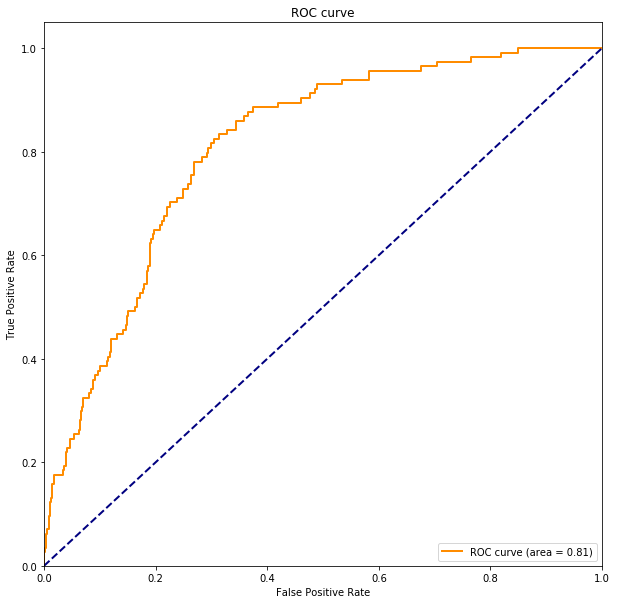

In [43]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

수치형 데이터에 대한 ROC Curve

In [44]:
fpr, tpr, _ = roc_curve(y_true=y2_test, y_score=LogisticRegression_model.predict_proba(x2_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

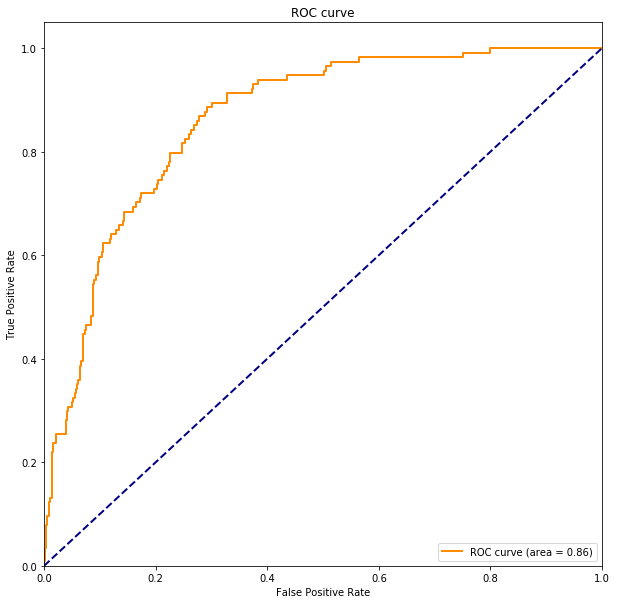

In [45]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

## 2) KNN

In [46]:
Kneighbors_model_pred_test = Kneighbors_model.predict_proba(x1_test)
print('범주형 정확도: ', accuracy_score(Kneighbors_model.predict(x1_test), y1_test))

범주형 정확도:  0.863961813842482


In [47]:
Kneighbors_model_pred_test = Kneighbors_model.predict_proba(x2_test)
print('수치형 정확도: ', accuracy_score(Kneighbors_model.predict(x2_test), y2_test))

수치형 정확도:  0.8663484486873508


## 3) SVM

In [48]:
predicted_y = model.predict(x1_test)
print('수치형 정확도 :', metrics.accuracy_score(predicted_y, y1_test))

수치형 정확도 : 0.863961813842482


In [49]:
predicted_y = model.predict(x2_test)
print('수치형 정확도 :', metrics.accuracy_score(predicted_y, y2_test))

수치형 정확도 : 0.8651551312649165


## 4) Gradient Boosting Classifier

In [50]:
mse = mean_squared_error(y1_train, GradientBoostingClassifier_model.predict(x1_train))
print("범주형 MSE: {}".format(mse))

범주형 MSE: 0.16790450928381964


In [51]:
mse = mean_squared_error(y1_test, GradientBoostingClassifier_model.predict(x1_test))
print("범주형 MSE: {}".format(mse))

범주형 MSE: 0.1360381861575179


In [52]:
mse = mean_squared_error(y2_train, GradientBoostingClassifier_model.predict(x2_train))
print("수치형 MSE: {}".format(mse))

수치형 MSE: 0.11724137931034483


In [53]:
mse = mean_squared_error(y2_test, GradientBoostingClassifier_model.predict(x2_test))
print("수치형 MSE: {}".format(mse))

수치형 MSE: 0.11575178997613365


In [54]:
print('범주형 정확도: ', accuracy_score(GradientBoostingClassifier_model.predict(x1_test), y1_test))

범주형 정확도:  0.863961813842482


In [55]:
print('수치형 정확도: ', accuracy_score(GradientBoostingClassifier_model.predict(x2_test), y2_test))

수치형 정확도:  0.8842482100238663


범주형 데이터 중 match와 상관관계가 높은 feature

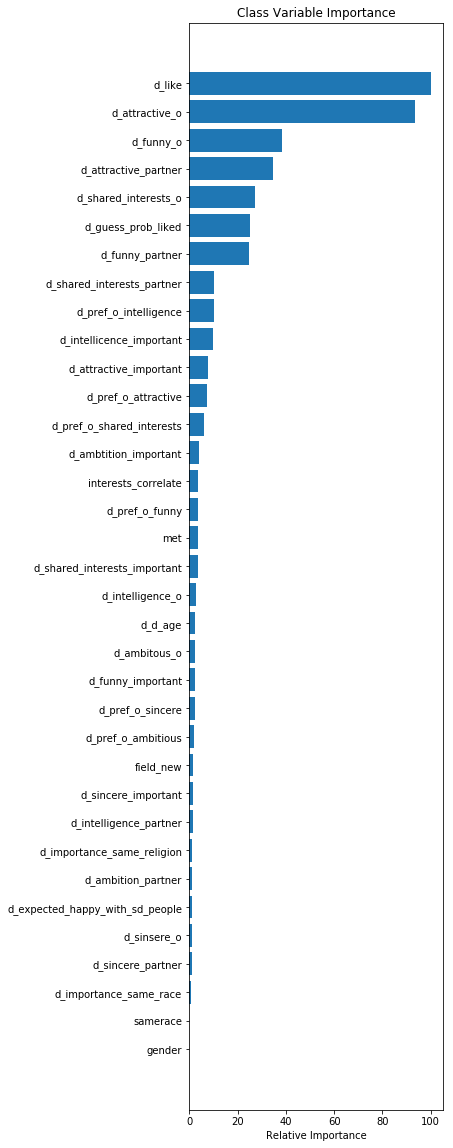

In [56]:
feature_importance = GradientBoostingClassifier_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10, 20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, class_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Class Variable Importance')
plt.show()

수치형 데이터 중 match와 상관관계가 높은 feature

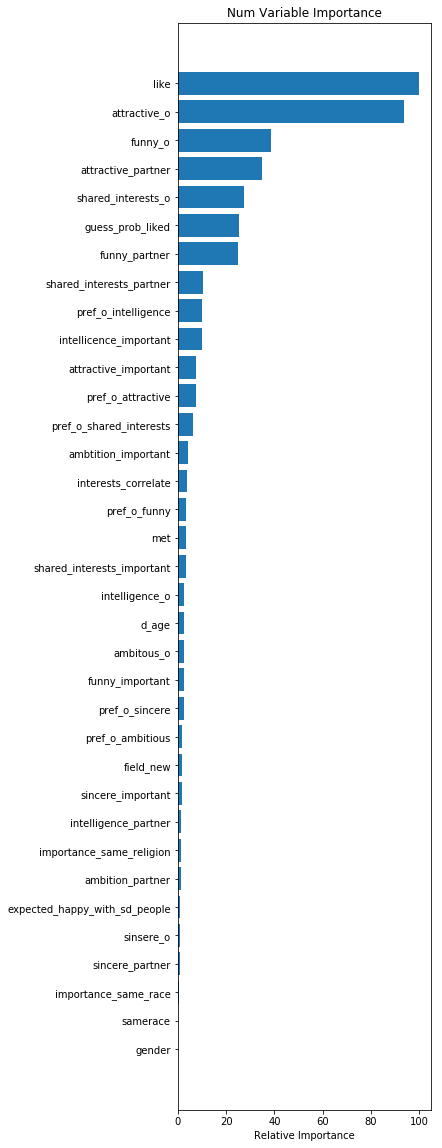

In [57]:
feature_importance = GradientBoostingClassifier_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10, 20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, num_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Num Variable Importance')
plt.show()

## Deep Learning (인공신경망) ##

In [58]:
import numpy as np
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [59]:
enc = OneHotEncoder(categories='auto')

enc.fit(y1_train)
y1_train = enc.transform(y1_train).toarray()

enc.fit(y1_test)
y1_test = enc.transform(y1_test).toarray()

print(y1_train.shape)
print(y1_test.shape)

(7540, 2)
(838, 2)


In [60]:
enc = OneHotEncoder(categories='auto')

enc.fit(y2_train)
y2_train = enc.transform(y2_train).toarray()

enc.fit(y2_test)
y2_test = enc.transform(y2_test).toarray()
                                                    #OneHotEncoder를 통해 타겟데이터의 feature를 2개로
print(y2_train.shape)
print(y2_test.shape)                                    

(7540, 2)
(838, 2)


### NN레이어 사용

- **Layer 3개 (노드갯수 : 각 35, 512, 512, 2개)**
- **AdamOptimizer 사용**

In [61]:
class_df.shape

(8378, 35)

In [62]:
y_data.shape

(8378, 1)

In [63]:
X = tf.placeholder(tf.float32, [None, 35]) # [# of batch data, # of features(columns)]
Y = tf.placeholder(tf.float32, [None, 2]) # 0~9 

In [64]:
W1 = tf.Variable(tf.random_normal([35, 512], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

Instructions for updating:
Colocations handled automatically by placer.


In [65]:
W2 = tf.Variable(tf.random_normal([512, 512], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [66]:
W3 = tf.Variable(tf.random_normal([512, 2], stddev=0.01))
model = tf.matmul(L2, W3)

In [67]:
cost = tf.losses.softmax_cross_entropy(Y, model) # for Classification
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [68]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [69]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [70]:
for epoch in range(15):
    total_cost = 0

    for batch_xs, batch_ys in shuffle_batch(x1_train, y1_train, 100):
#     for i in range(total_batch):
#         batch_xs, batch_ys = mnist.train.next_batch(100)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    test_cost = sess.run([cost], feed_dict={X: x1_test, Y: y1_test}) # current test error
    
    print('Epoch: {}'.format(epoch+1), 
          '|| Avg. Training cost = {:.3f}'.format(total_cost / 75),
          '|| Current Test cost = {:.3f}'.format(test_cost[0]))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.421 || Current Test cost = 0.351
Epoch: 2 || Avg. Training cost = 0.367 || Current Test cost = 0.320
Epoch: 3 || Avg. Training cost = 0.357 || Current Test cost = 0.313
Epoch: 4 || Avg. Training cost = 0.348 || Current Test cost = 0.307
Epoch: 5 || Avg. Training cost = 0.340 || Current Test cost = 0.305
Epoch: 6 || Avg. Training cost = 0.336 || Current Test cost = 0.301
Epoch: 7 || Avg. Training cost = 0.329 || Current Test cost = 0.305
Epoch: 8 || Avg. Training cost = 0.325 || Current Test cost = 0.303
Epoch: 9 || Avg. Training cost = 0.322 || Current Test cost = 0.305
Epoch: 10 || Avg. Training cost = 0.316 || Current Test cost = 0.301
Epoch: 11 || Avg. Training cost = 0.310 || Current Test cost = 0.313
Epoch: 12 || Avg. Training cost = 0.302 || Current Test cost = 0.306
Epoch: 13 || Avg. Training cost = 0.299 || Current Test cost = 0.326
Epoch: 14 || Avg. Training cost = 0.294 || Current Test cost = 0.318
Epoch: 15 || Avg. Training cost = 0.288 || 

In [71]:
for epoch in range(15):
    total_cost = 0

    for batch_xs, batch_ys in shuffle_batch(x2_train, y2_train, 100):
#     for i in range(total_batch):
#         batch_xs, batch_ys = mnist.train.next_batch(100)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    test_cost = sess.run([cost], feed_dict={X: x2_test, Y: y2_test}) # current test error
    
    print('Epoch: {}'.format(epoch+1), 
          '|| Avg. Training cost = {:.3f}'.format(total_cost / 75),
          '|| Current Test cost = {:.3f}'.format(test_cost[0]))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.779 || Current Test cost = 0.375
Epoch: 2 || Avg. Training cost = 0.387 || Current Test cost = 0.317
Epoch: 3 || Avg. Training cost = 0.353 || Current Test cost = 0.302
Epoch: 4 || Avg. Training cost = 0.348 || Current Test cost = 0.297
Epoch: 5 || Avg. Training cost = 0.345 || Current Test cost = 0.299
Epoch: 6 || Avg. Training cost = 0.346 || Current Test cost = 0.297
Epoch: 7 || Avg. Training cost = 0.342 || Current Test cost = 0.294
Epoch: 8 || Avg. Training cost = 0.340 || Current Test cost = 0.301
Epoch: 9 || Avg. Training cost = 0.346 || Current Test cost = 0.293
Epoch: 10 || Avg. Training cost = 0.338 || Current Test cost = 0.296
Epoch: 11 || Avg. Training cost = 0.340 || Current Test cost = 0.301
Epoch: 12 || Avg. Training cost = 0.339 || Current Test cost = 0.297
Epoch: 13 || Avg. Training cost = 0.336 || Current Test cost = 0.293
Epoch: 14 || Avg. Training cost = 0.336 || Current Test cost = 0.290
Epoch: 15 || Avg. Training cost = 0.334 || 

In [72]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # model : 예측값, Y : 실제 정답
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [73]:
print('범주형 정확도 :', sess.run(accuracy,
                        feed_dict={X: x1_test,
                                   Y: y1_test}))

범주형 정확도 : 0.8627685


In [74]:
print('수치형 정확도 :', sess.run(accuracy,
                        feed_dict={X: x2_test,
                                   Y: y2_test}))

수치형 정확도 : 0.8639618


### Keras 레이어 사용

In [75]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=35, units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=2, activation='softmax')) # 0~9 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [76]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

In [77]:
class_deep = model.fit(x1_train, y1_train, batch_size=75, epochs=15, validation_split=0.2) 

Train on 6032 samples, validate on 1508 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
6032/6032 [==============================] - 3s 426us/sample - loss: 0.4411 - categorical_accuracy: 0.8161 - val_loss: 0.5536 - val_categorical_accuracy: 0.7221
Epoch 2/15
6032/6032 [==============================] - 1s 191us/sample - loss: 0.3606 - categorical_accuracy: 0.8430 - val_loss: 0.4023 - val_categorical_accuracy: 0.8050
Epoch 3/15
6032/6032 [==============================] - 1s 195us/sample - loss: 0.3363 - categorical_accuracy: 0.8534 - val_loss: 0.3760 - val_categorical_accuracy: 0.8282
Epoch 4/15
6032/6032 [==============================] - 1s 193us/sample - loss: 0.3233 - categorical_accuracy: 0.8543 - val_loss: 0.3663 - val_categorical_accuracy: 0.8309
Epoch 5/15
6032/6032 [==============================] - 1s 205us/sample - loss: 0.3069 - categorical_accuracy: 0.8627 - val_loss: 0.3673 - val_categorical_accuracy: 0.8355
Epoch 6/15
6032/6032 [======================

In [78]:
num_deep = model.fit(x2_train, y2_train, batch_size=75, epochs=15, validation_split=0.2) 

Train on 6032 samples, validate on 1508 samples
Epoch 1/15
6032/6032 [==============================] - 1s 239us/sample - loss: 0.4040 - categorical_accuracy: 0.8352 - val_loss: 0.7507 - val_categorical_accuracy: 0.6306
Epoch 2/15
6032/6032 [==============================] - 1s 226us/sample - loss: 0.3421 - categorical_accuracy: 0.8518 - val_loss: 0.6862 - val_categorical_accuracy: 0.6718
Epoch 3/15
6032/6032 [==============================] - 1s 205us/sample - loss: 0.3190 - categorical_accuracy: 0.8584 - val_loss: 0.3907 - val_categorical_accuracy: 0.8176
Epoch 4/15
6032/6032 [==============================] - 1s 214us/sample - loss: 0.3176 - categorical_accuracy: 0.8624 - val_loss: 0.4603 - val_categorical_accuracy: 0.7818
Epoch 5/15
6032/6032 [==============================] - 1s 228us/sample - loss: 0.2944 - categorical_accuracy: 0.8733 - val_loss: 0.3578 - val_categorical_accuracy: 0.8428
Epoch 6/15
6032/6032 [==============================] - 1s 196us/sample - loss: 0.2969 - cat

In [79]:
result = model.evaluate(x1_train, y1_train, batch_size=75)

print('loss (cross-entropy) :', result[0])
print('class test accuracy :', result[1])

7540/7540 [==============================] - 0s 53us/sample - loss: 2.7063 - categorical_accuracy: 0.8321
loss (cross-entropy) : 2.706300934761842
class test accuracy : 0.8320955


In [80]:
result = model.evaluate(x2_train, y2_train, batch_size=75)

print('loss (cross-entropy) :', result[0])
print('num test accuracy :', result[1])

7540/7540 [==============================] - 0s 55us/sample - loss: 0.2240 - categorical_accuracy: 0.9138
loss (cross-entropy) : 0.22399691880658387
num test accuracy : 0.9137931


**범주형 데이터 딥러닝 결과**

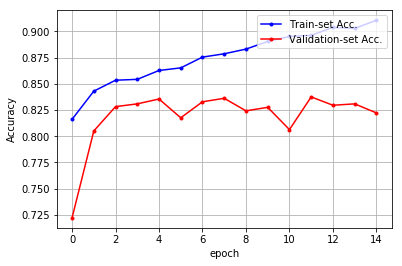

In [81]:
val_acc = class_deep.history['val_categorical_accuracy']
acc = class_deep.history['categorical_accuracy']

import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

**수치형 데이터 딥러닝 결과**

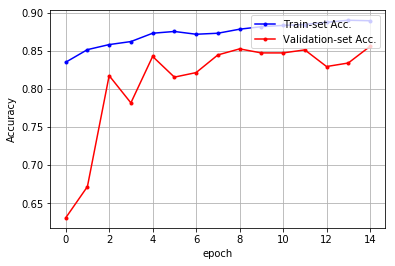

In [82]:
val_acc = num_deep.history['val_categorical_accuracy']
acc = num_deep.history['categorical_accuracy']

import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# 5. 분석 및 모델링 결과(각종 지표 수치 제시)

In [83]:
Analysis_df = df_data.copy()

In [84]:
Analysis_df['gender'] = Analysis_df['gender'].replace(['male', 'female'], [0,1]) # 텍스트 숫자로 교체


In [85]:
pd.crosstab(index=df_data['match'], columns='counts')

col_0,counts
match,
0,6998
1,1380


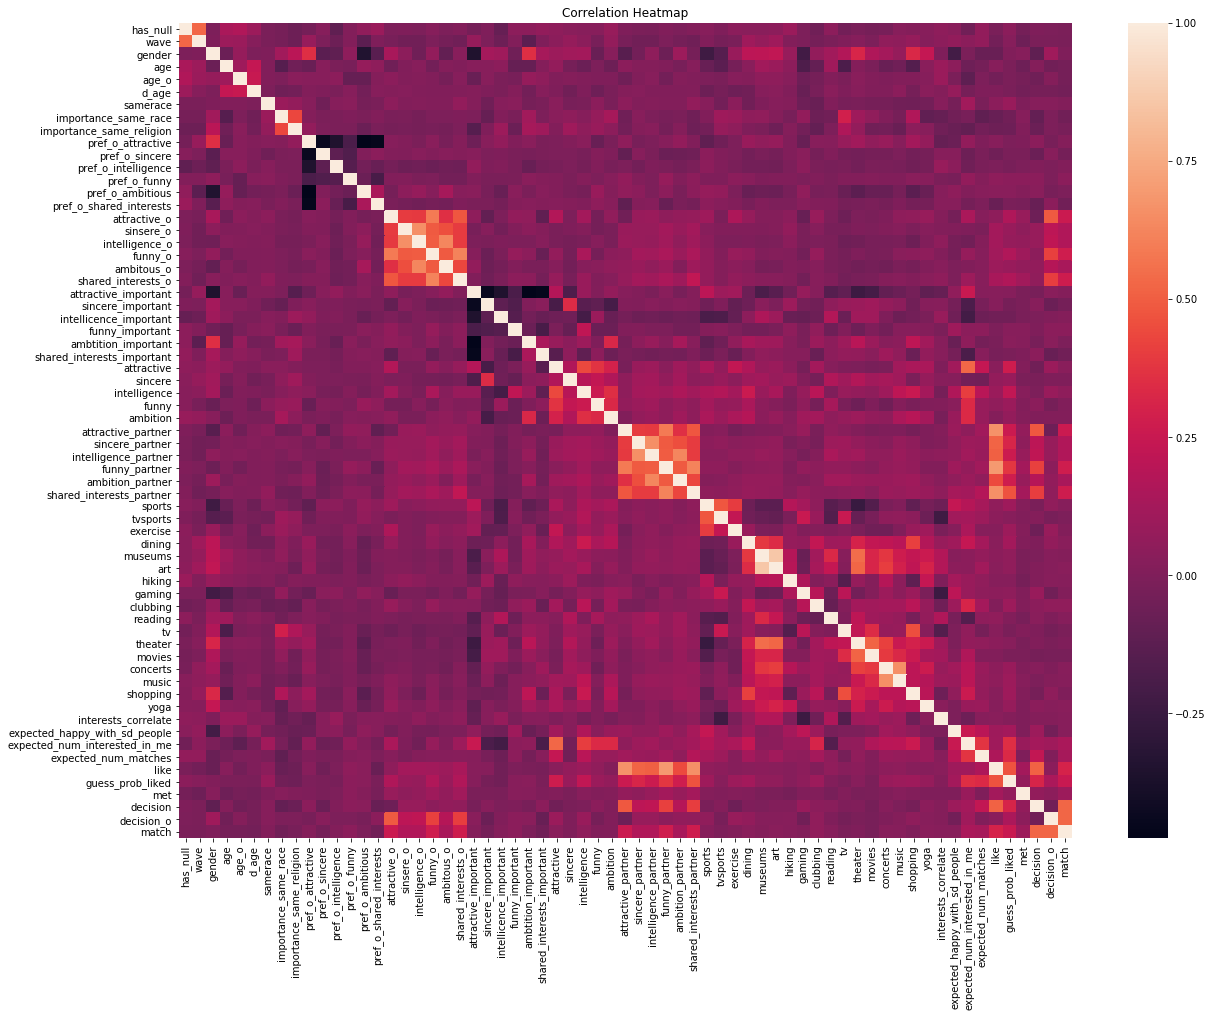

In [86]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title('Correlation Heatmap')
corr = Analysis_df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [ ]:
# pref_o_attractive : How important does partner rate attractiveness
# pref_o_sinsere : How important does partner rate sincerity
# pref_o_intelligence : How important does partner rate intelligence
# pref_o_funny : How important does partner rate being funny
# pref_o_ambitious : How important does partner rate ambition
# pref_o_shared_interests : How important does partner rate having shared interests


# gender 0
# d_age 3
# samerace 1
# importance_same_race 8
# importance_same_religion 9

# pref_o_attractive    30
# pref_o_sincere       60
# pref_o_intelligence  30
# pref_o_funny         30
# pref_o_ambitious     50
# pref_o_shared_interests 30

# attractive_o 8
# sinsere_o 9
# intelligence_o 9
# funny_o 9
# ambitous_o 8
# shared_interests_o 8

# attractive_important 90
# sincere_important 50
# intellicence_important 35
# funny_important 40
# ambtition_important 40 
# shared_interests_important 25

# attractive_partner 8
# sincere_partner 7
# intelligence_partner 7
# funny_partner 8
# ambition_partner 8
# shared_interests_partner 7

# interests_correlate 0.80
# expected_happy_with_sd_people 8
# like 8
# guess_prob_liked 8
# met 0
# field_new 1




# 6. 추가로 분석하면 좋을 과제